# Importar datos

In [2]:
!kaggle datasets download -d sumanthvrao/daily-climate-time-series-data

Dataset URL: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data
License(s): CC0-1.0
  0% 0.00/22.0k [00:00<?, ?B/s]
100% 22.0k/22.0k [00:00<00:00, 34.2MB/s]


In [3]:
!unzip daily-climate-time-series-data.zip

Archive:  daily-climate-time-series-data.zip
  inflating: DailyDelhiClimateTest.csv  
  inflating: DailyDelhiClimateTrain.csv  


In [4]:
import pandas as pd
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [6]:
df_test = pd.read_csv('DailyDelhiClimateTest.csv')
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


# Datos de entrenamiento

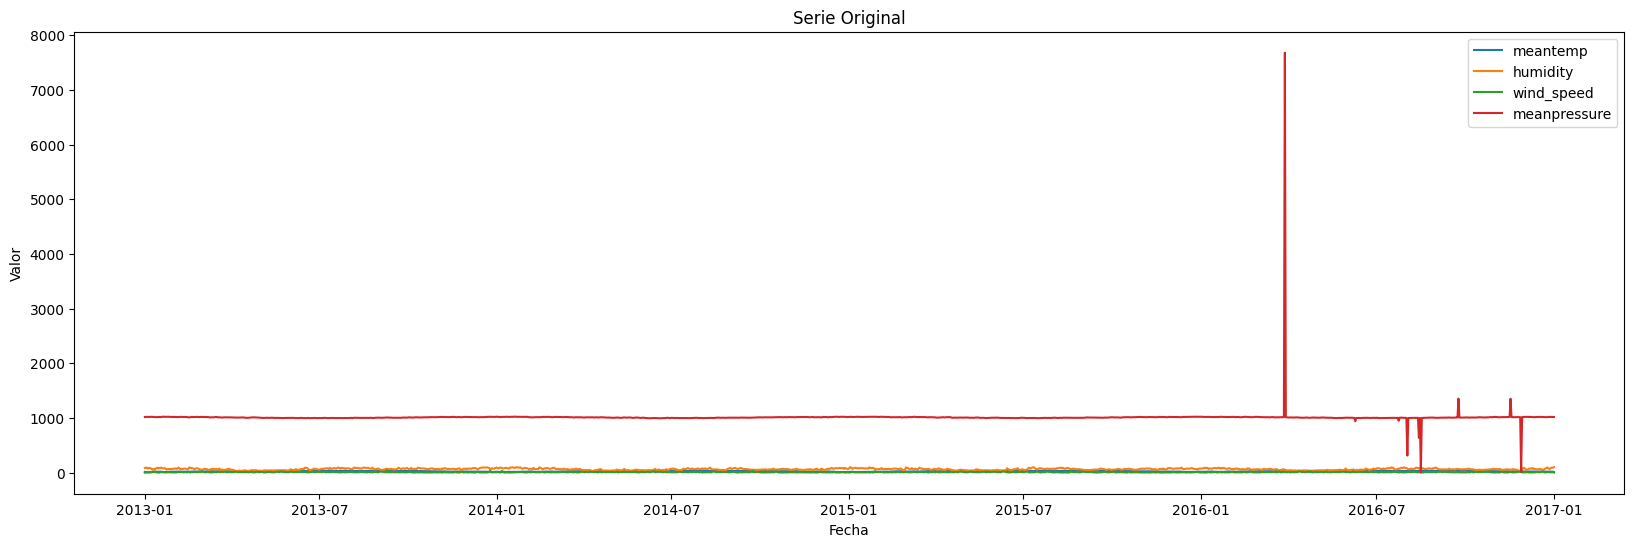

In [8]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
df_train['date'] = pd.to_datetime(df_train['date'])
df_test['date'] = pd.to_datetime(df_test['date'])
df_train.set_index('date', inplace=True)
df_test.set_index('date', inplace=True)
plt.figure(figsize=(20, 6))
plt.plot(df_train, label=df_train.columns)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Original')
plt.legend()
plt.show()

In [9]:
descomposition = seasonal_decompose(df_train[['meantemp']], model='additive')

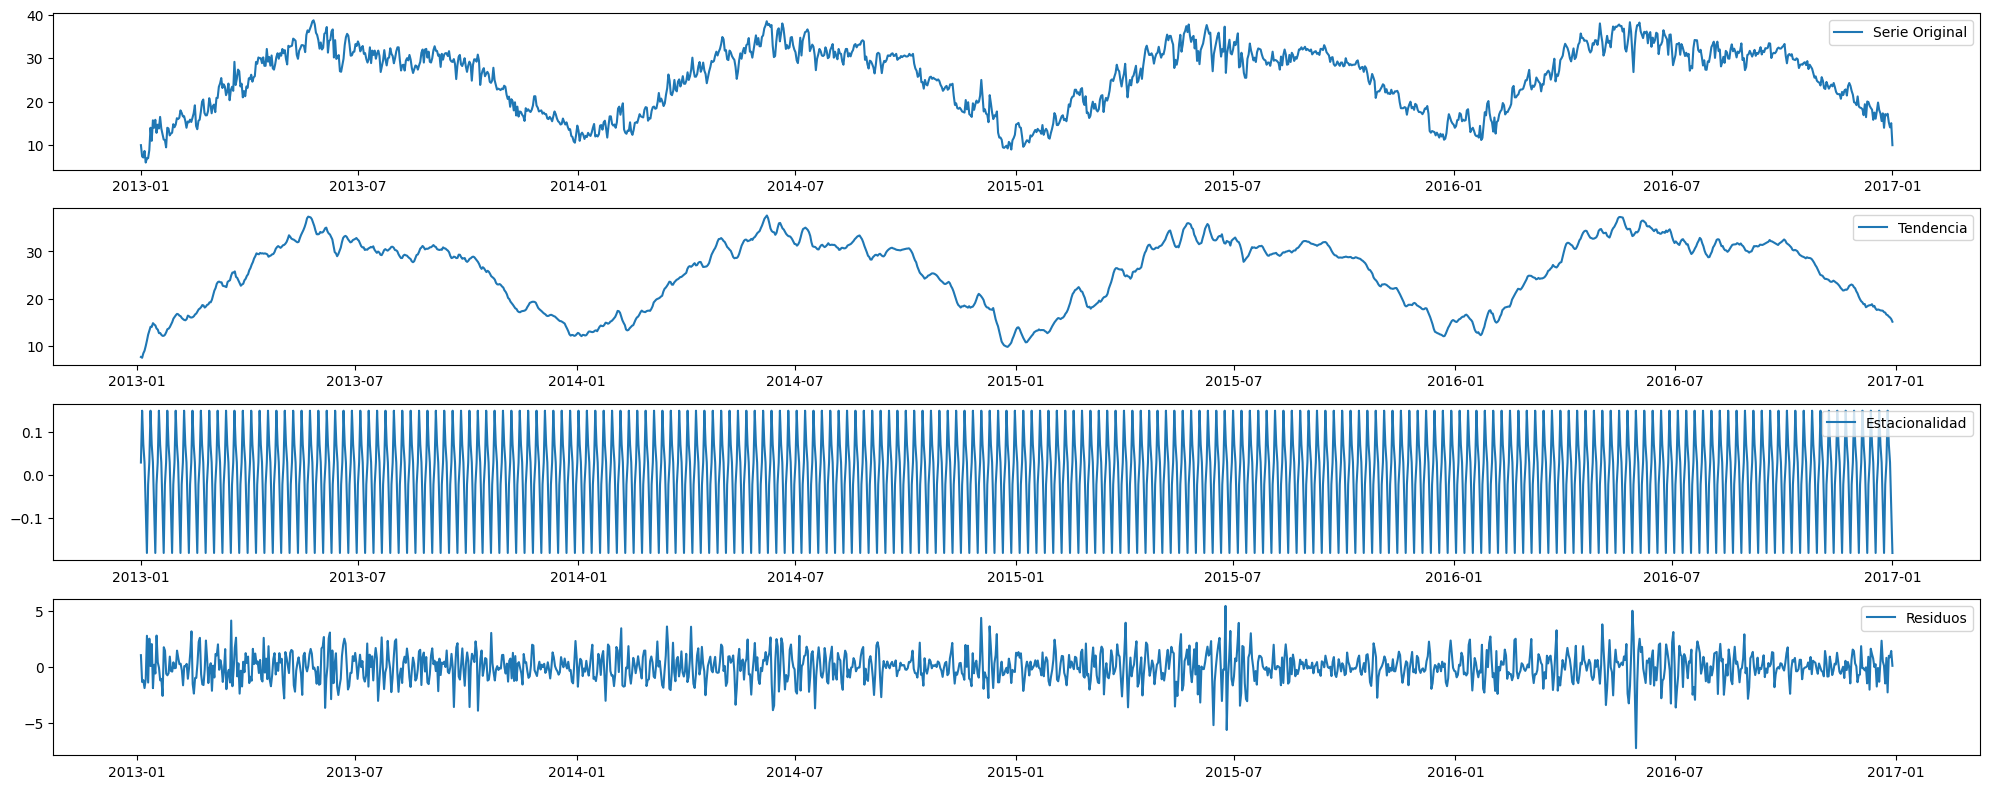

In [10]:
plt.figure(figsize=(20, 8))
plt.subplot(411)
plt.plot(df_train[['meantemp']], label='Serie Original')
plt.legend()

plt.subplot(412)
plt.plot(descomposition.trend, label='Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(descomposition.seasonal, label='Estacionalidad')
plt.legend()

plt.subplot(414)
plt.plot(descomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# Datos de test

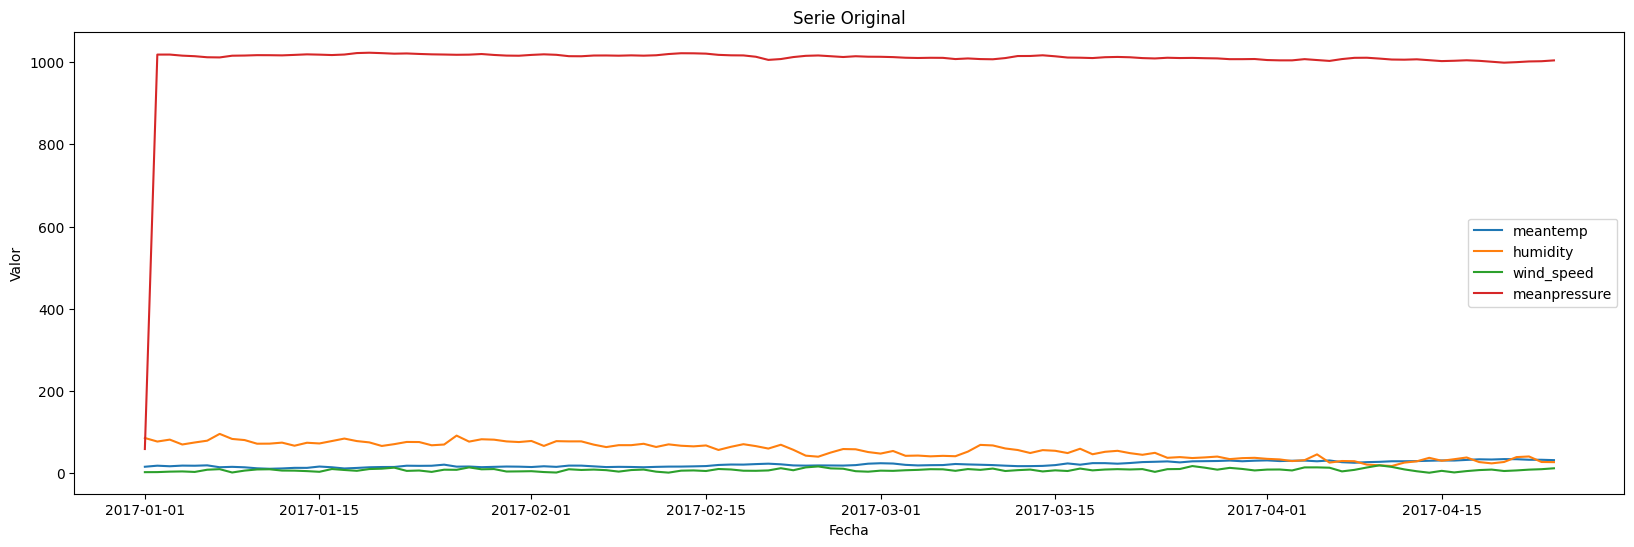

In [11]:

plt.figure(figsize=(20, 6))
plt.plot(df_test, label=df_test.columns)
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Serie Original')
plt.legend()
plt.show()

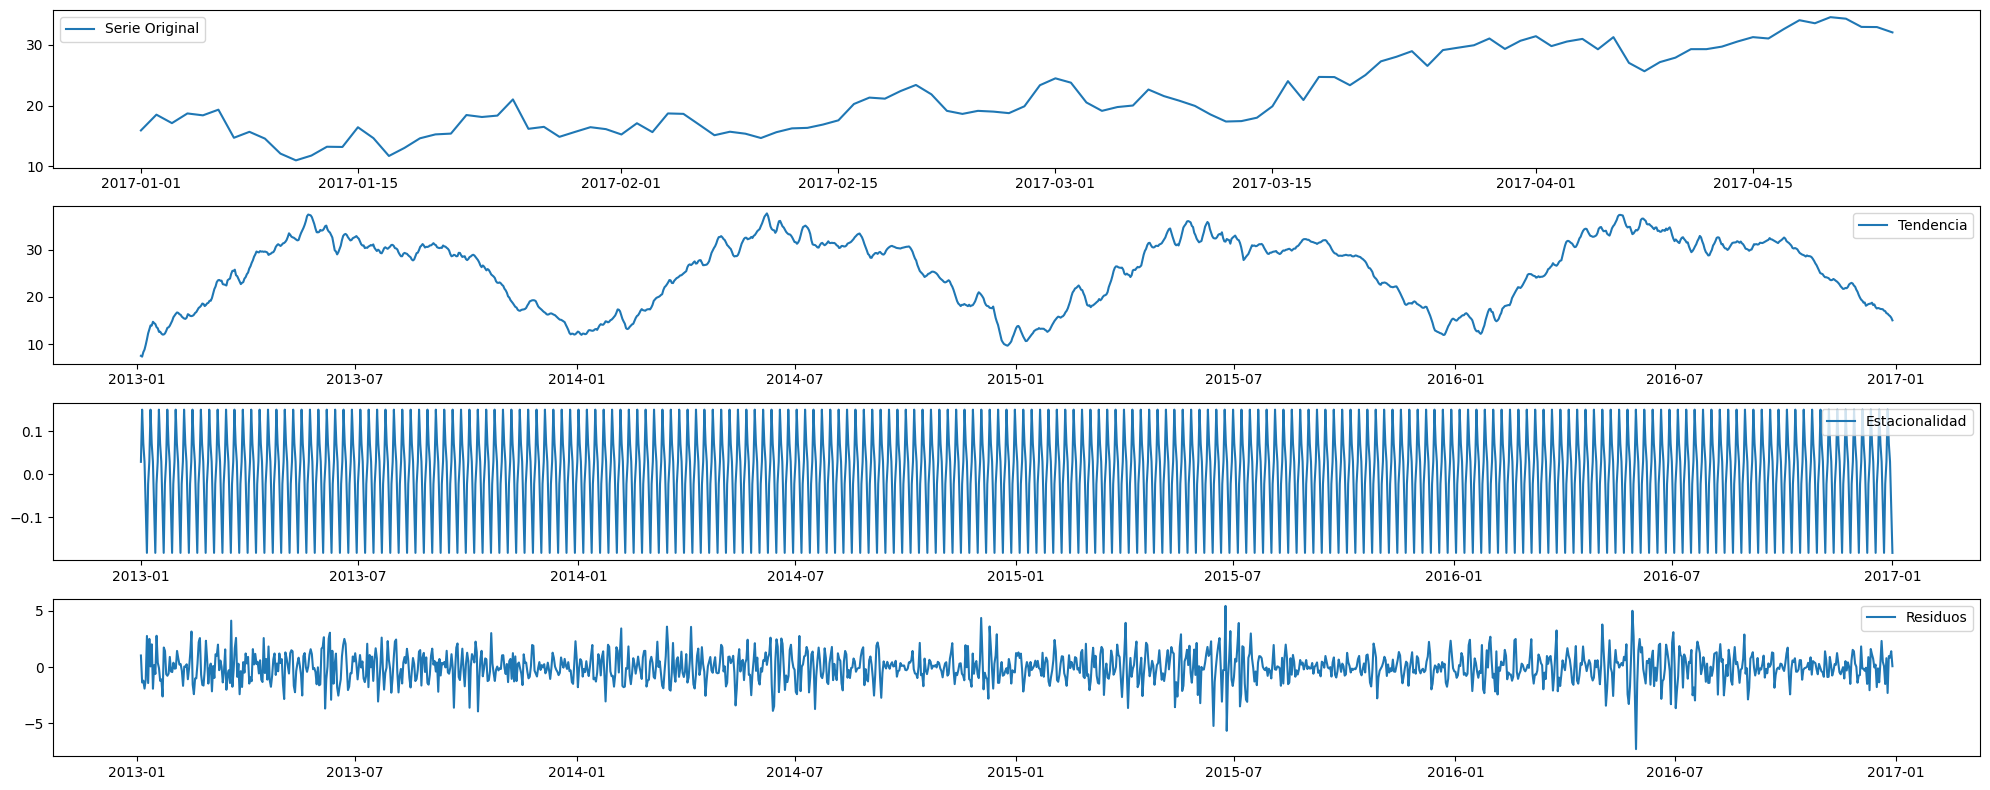

In [12]:
plt.figure(figsize=(20, 8))
plt.subplot(411)
plt.plot(df_test[['meantemp']], label='Serie Original')
plt.legend()

plt.subplot(412)
plt.plot(descomposition.trend, label='Tendencia')
plt.legend()

plt.subplot(413)
plt.plot(descomposition.seasonal, label='Estacionalidad')
plt.legend()

plt.subplot(414)
plt.plot(descomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

In [13]:
descomposition = seasonal_decompose(df_test[['meantemp']], model='additive')

### Modelo ARIMA

In [14]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
model=ARIMA(df_train[['meantemp']],order=(10,1,10))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### Pronóstico

In [15]:
forecast=model_fit.forecast(steps=len(df_test[['meantemp']]))

### Gráfica de los datos originales y el pronóstico

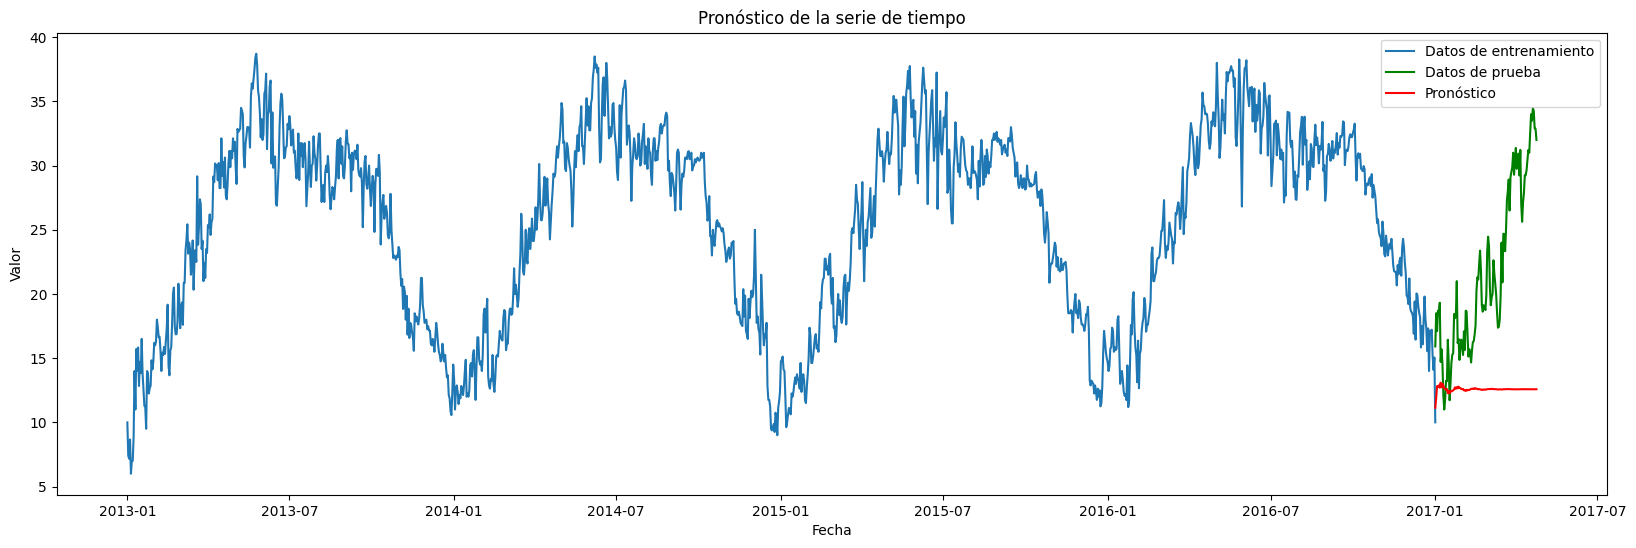

In [16]:
plt.figure(figsize=(20,6))
plt.plot(df_train[['meantemp']],label='Datos de entrenamiento')
plt.plot(df_test[['meantemp']],label='Datos de prueba', color='green')
plt.plot(df_test.index,forecast,label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de la serie de tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

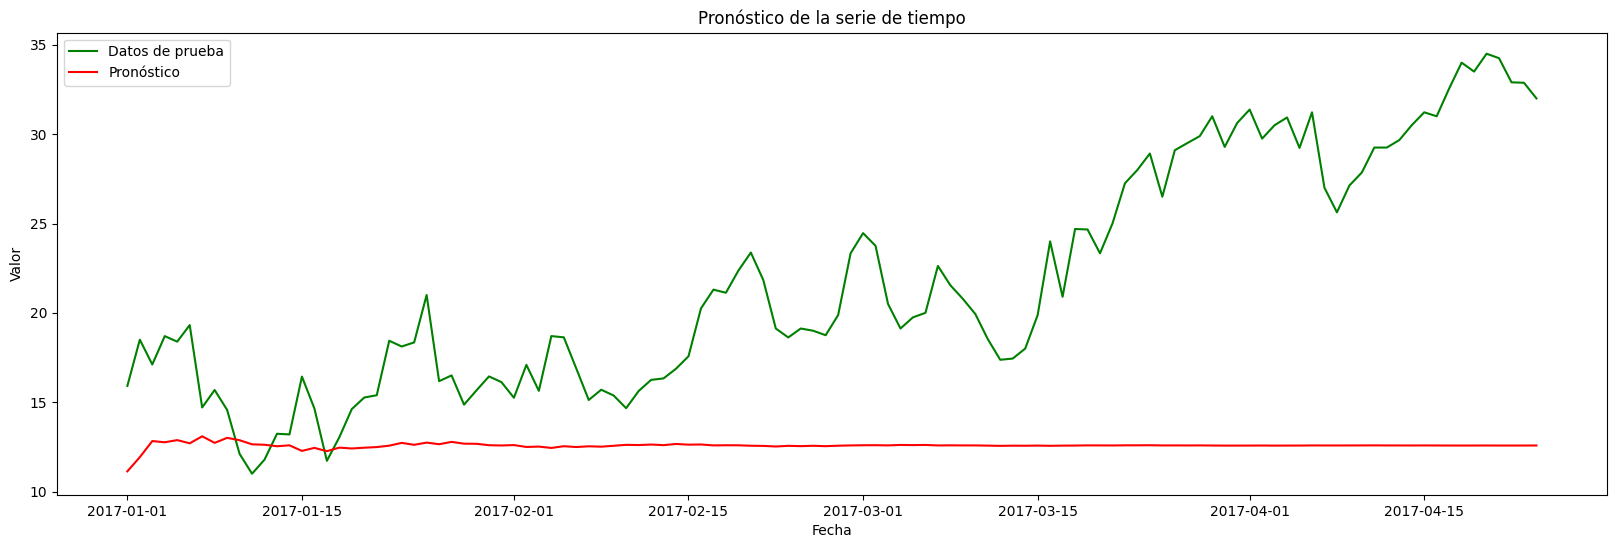

In [17]:
plt.figure(figsize=(20,6))
plt.plot(df_test[['meantemp']],label='Datos de prueba', color='green')
plt.plot(df_test.index,forecast,label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de la serie de tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

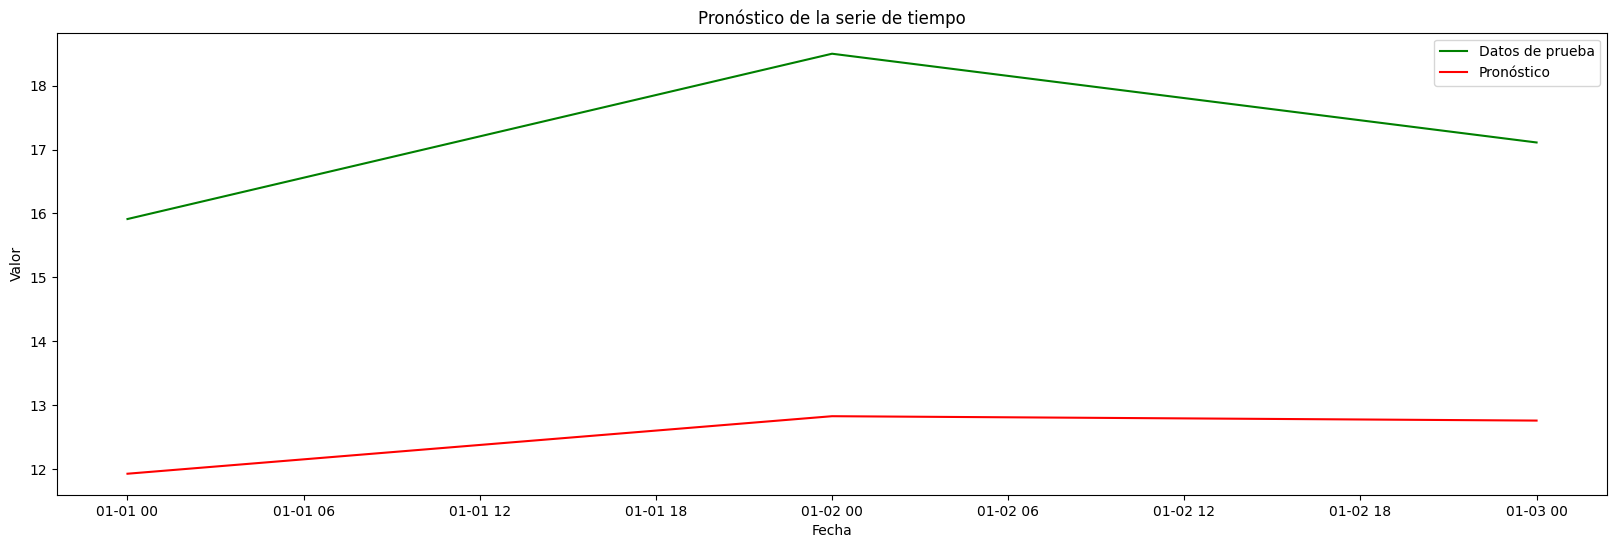

In [18]:
plt.figure(figsize=(20,6))
plt.plot(df_test[['meantemp']][0:3],label='Datos de prueba', color='green')
plt.plot(df_test.index[0:3],forecast[1:4],label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de la serie de tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

# Métricas

MAE: 9.26629368766285
RMSE: 11.16396796920232
MAPE: 37.81978073046165%
R²: -2.1042000627892476
            Predicciones  Valores Reales    Errores
2017-01-02     11.132715       18.500000   7.367285
2017-01-03     11.927333       17.111111   5.183778
2017-01-04     12.827438       18.700000   5.872562
2017-01-05     12.758932       18.388889   5.629957
2017-01-06     12.880811       19.318182   6.437371
...                  ...             ...        ...
2017-04-20     12.577811       34.500000  21.922189
2017-04-21     12.579307       34.250000  21.670693
2017-04-22     12.577157       32.900000  20.322843
2017-04-23     12.577434       32.875000  20.297566
2017-04-24     12.577260       32.000000  19.422740

[113 rows x 3 columns]


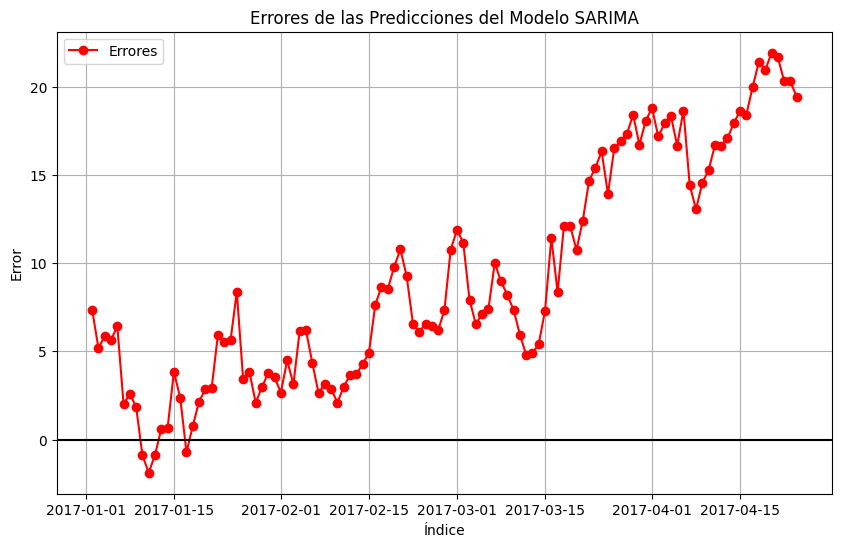

In [19]:

from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae = mean_absolute_error( df_test['meantemp'][1:], forecast[0:-1])
rmse = np.sqrt(mean_squared_error( df_test['meantemp'][1:], forecast[0:-1]))
mape = np.mean(np.abs(( df_test['meantemp'][1:] - forecast[0:-1]) /  df_test['meantemp'][1:])) * 100
r2 = r2_score( df_test['meantemp'][1:], forecast[0:-1])

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

# Cálculo de los errores (residuos)
errors = df_test['meantemp'][1:]-forecast[0:-1]

resultados = pd.DataFrame({
    'Predicciones': forecast[0:-1],
    'Valores Reales': df_test['meantemp'][1:],
    'Errores': errors
})

# Imprimir la tabla con las predicciones, valores reales y errores
print(resultados)

# Graficar los errores
plt.figure(figsize=(10, 6))
plt.plot(resultados['Errores'], marker='o', linestyle='-', color='r', label='Errores')
plt.axhline(0, color='black', linewidth=1.5)  # Línea en el cero para facilitar la visualización
plt.title('Errores de las Predicciones del Modelo SARIMA')
plt.xlabel('Índice')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
forecast[0:3]

,predicted_mean
2017-01-02,11.132715
2017-01-03,11.927333
2017-01-04,12.827438


In [21]:
df_test['meantemp'][1:4]

,meantemp
date,
2017-01-02,18.500000
2017-01-03,17.111111
2017-01-04,18.700000


### Modelo SARIMA

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

import numpy as np
model = SARIMAX(df_train[['meantemp']], order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


### Pronóstico

In [23]:
forecast=model_fit.forecast(steps=len(df_test[['meantemp']]))

### Gráfica de los datos originales y el pronóstico

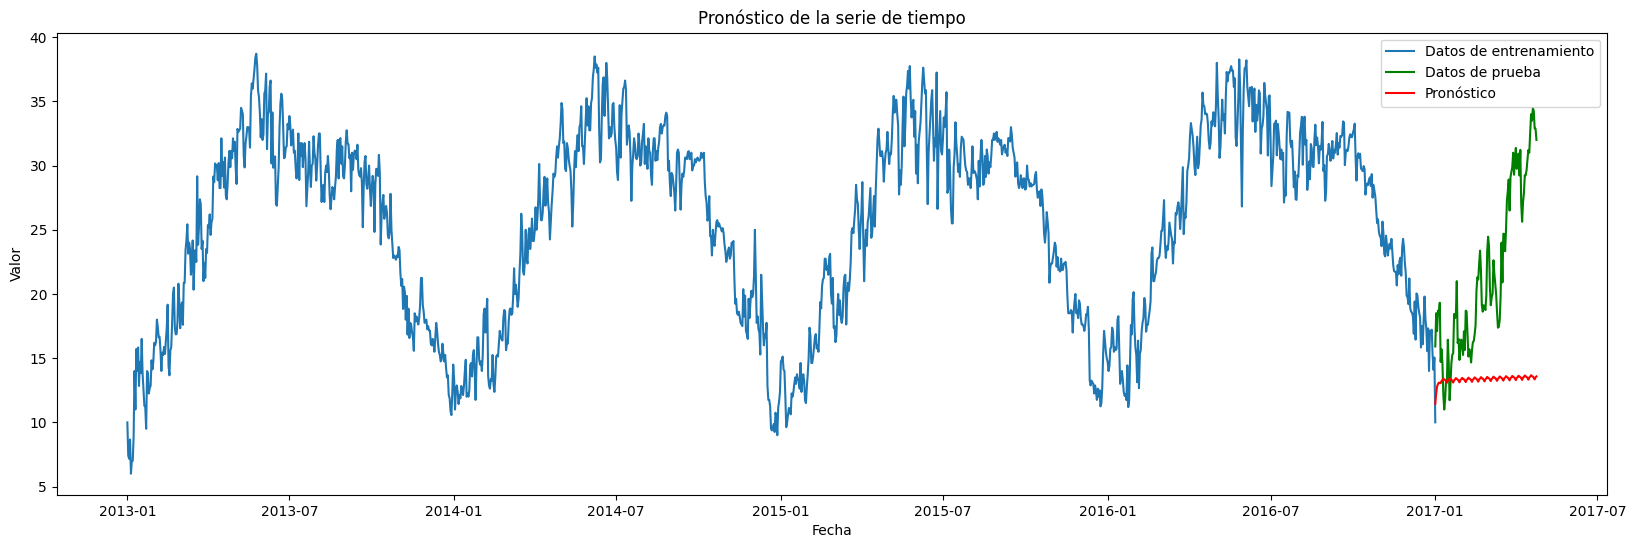

In [24]:
plt.figure(figsize=(20,6))
plt.plot(df_train[['meantemp']],label='Datos de entrenamiento')
plt.plot(df_test[['meantemp']],label='Datos de prueba', color='green')
plt.plot(df_test.index,forecast,label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de la serie de tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

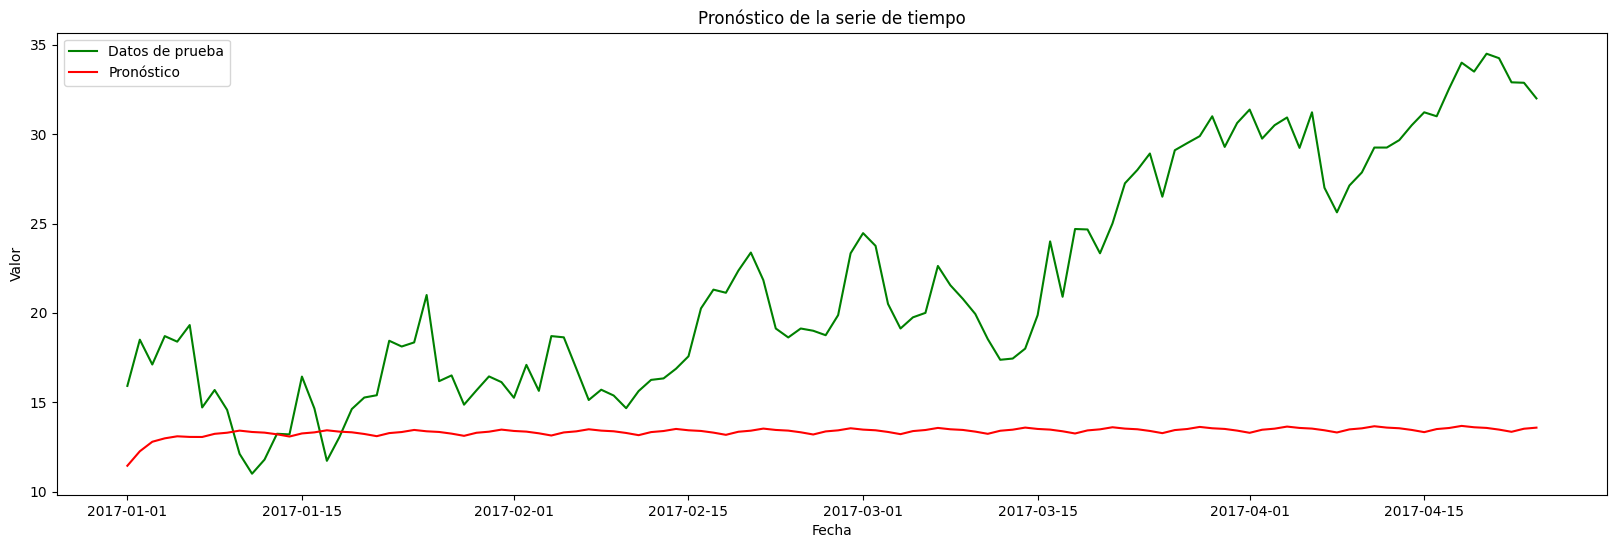

In [25]:
plt.figure(figsize=(20,6))
plt.plot(df_test[['meantemp']],label='Datos de prueba', color='green')
plt.plot(df_test.index,forecast,label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de la serie de tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

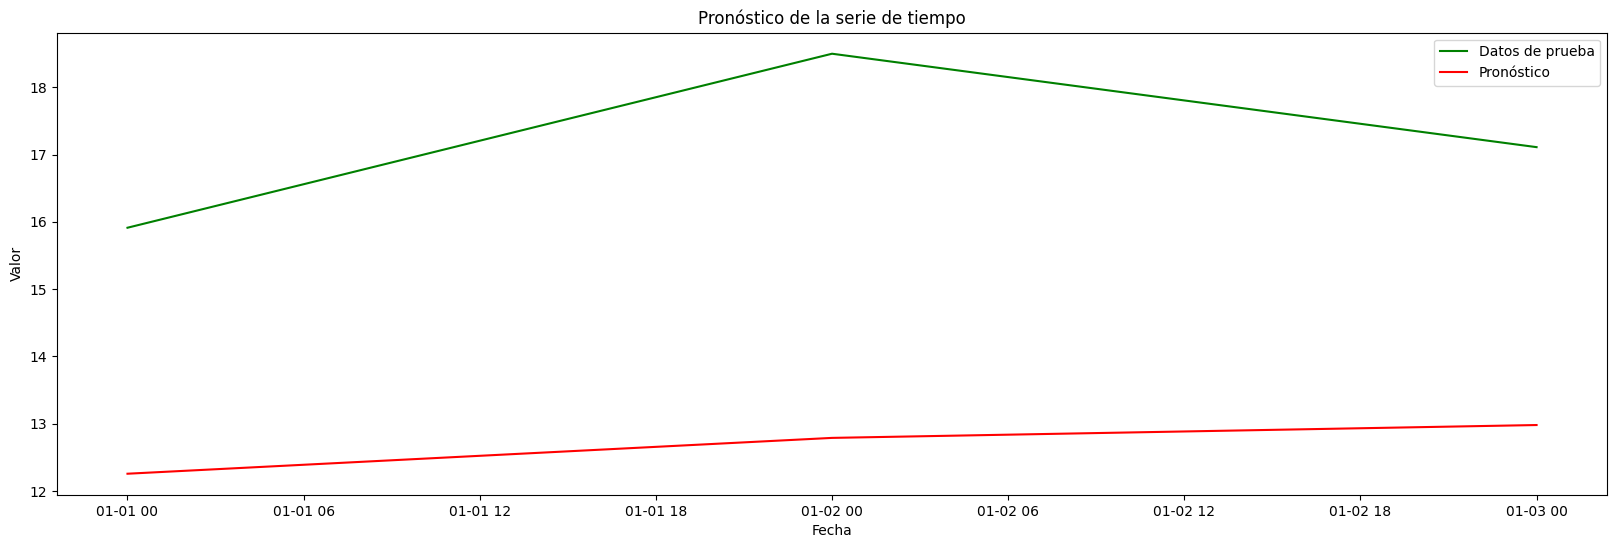

In [26]:
plt.figure(figsize=(20,6))
plt.plot(df_test[['meantemp']][0:3],label='Datos de prueba', color='green')
plt.plot(df_test.index[0:3],forecast[1:4],label='Pronóstico', color='red')
plt.legend()
plt.title('Pronóstico de la serie de tiempo')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.show()

# Métricas

MAE: 8.537692304799565
RMSE: 10.473854129745114
MAPE: 34.484921326597%
R²: -1.732282384229006
            Predicciones  Valores Reales    Errores
2017-01-02     11.445620       18.500000   7.054380
2017-01-03     12.255990       17.111111   4.855121
2017-01-04     12.788657       18.700000   5.911343
2017-01-05     12.979816       18.388889   5.409073
2017-01-06     13.094047       19.318182   6.224135
...                  ...             ...        ...
2017-04-20     13.599474       34.500000  20.900526
2017-04-21     13.562592       34.250000  20.687408
2017-04-22     13.468629       32.900000  19.431371
2017-04-23     13.345612       32.875000  19.529388
2017-04-24     13.517699       32.000000  18.482301

[113 rows x 3 columns]


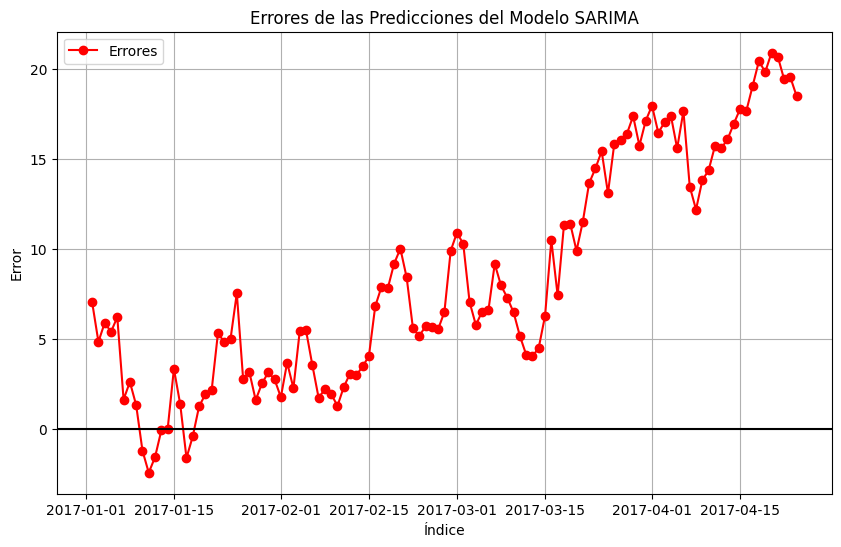

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae = mean_absolute_error( df_test['meantemp'][1:], forecast[0:-1])
rmse = np.sqrt(mean_squared_error( df_test['meantemp'][1:], forecast[0:-1]))
mape = np.mean(np.abs(( df_test['meantemp'][1:] - forecast[0:-1]) /  df_test['meantemp'][1:])) * 100
r2 = r2_score( df_test['meantemp'][1:], forecast[0:-1])

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

# Cálculo de los errores (residuos)
errors = df_test['meantemp'][1:]-forecast[0:-1]

resultados = pd.DataFrame({
    'Predicciones': forecast[0:-1],
    'Valores Reales': df_test['meantemp'][1:],
    'Errores': errors
})

# Imprimir la tabla con las predicciones, valores reales y errores
print(resultados)

# Graficar los errores
plt.figure(figsize=(10, 6))
plt.plot(resultados['Errores'], marker='o', linestyle='-', color='r', label='Errores')
plt.axhline(0, color='black', linewidth=1.5)  # Línea en el cero para facilitar la visualización
plt.title('Errores de las Predicciones del Modelo SARIMA')
plt.xlabel('Índice')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
forecast[0:-1]

,predicted_mean
2017-01-02,11.445620
2017-01-03,12.255990
2017-01-04,12.788657
2017-01-05,12.979816
2017-01-06,13.094047
...,...
2017-04-20,13.599474
2017-04-21,13.562592
2017-04-22,13.468629
2017-04-23,13.345612


In [29]:
df_test['meantemp'][1:]-forecast[0:-1]

,0
date,
2017-01-02,7.054380
2017-01-03,4.855121
2017-01-04,5.911343
2017-01-05,5.409073
2017-01-06,6.224135
...,...
2017-04-20,20.900526
2017-04-21,20.687408
2017-04-22,19.431371
